In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("csv/timeseries.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   date                                    501 non-null    object 
 1   country                                 501 non-null    object 
 2   state                                   501 non-null    object 
 3   county                                  0 non-null      float64
 4   fips                                    501 non-null    int64  
 5   lat                                     0 non-null      float64
 6   long                                    0 non-null      float64
 7   locationId                              501 non-null    object 
 8   actuals.cases                           492 non-null    float64
 9   actuals.deaths                          492 non-null    float64
 10  actuals.positiveTests                   496 non-null    float6

In [4]:
data.describe(include="object")

,date,country,state,locationId,actuals.contactTracers,actuals.icuBeds.currentUsageCovid
count,501,501,501,501,501,495
unique,481,1,1,1,8,260
top,2020-03-02,US,PA,iso1:us#iso2:us-pa,1508,Not Available
freq,2,501,501,501,285,193


In [5]:
data.describe()

,county,fips,lat,long,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.hospitalBeds.capacity,actuals.hospitalBeds.currentUsageTotal,...,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered
count,0.0,501.0,0.0,0.0,4.920000e+02,492.000000,4.960000e+02,4.980000e+02,0.0,302.000000,...,488.000000,488.000000,302.000000,0.0,302.000000,501.000000,156.000000,156.000000,489.000000,1.560000e+02
mean,NaN,42.0,NaN,NaN,4.610324e+05,12899.796748,4.984688e+05,5.395527e+06,NaN,25574.609272,...,1.043217,0.111865,0.364834,NaN,0.783377,1.922156,0.345308,0.222532,56.905930,7.047403e+06
std,NaN,0.0,NaN,NaN,4.402533e+05,9208.187981,4.503788e+05,4.734033e+06,NaN,1712.532400,...,0.265452,0.067447,0.156075,NaN,0.034572,1.069546,0.202455,0.166312,71.124741,4.508568e+06
min,NaN,42.0,NaN,NaN,2.000000e+00,0.000000,1.000000e+00,9.000000e+00,NaN,21074.000000,...,0.670000,0.100000,0.090000,NaN,0.680000,0.000000,0.028000,0.004000,0.000000,4.104140e+05
25%,NaN,42.0,NaN,NaN,9.170450e+04,6701.750000,1.169840e+05,8.947250e+05,NaN,24286.500000,...,0.890000,0.100000,0.242500,NaN,0.760000,1.000000,0.144750,0.062000,13.000000,2.647661e+06
50%,NaN,42.0,NaN,NaN,1.923740e+05,8644.500000,2.400670e+05,3.855450e+06,NaN,25433.500000,...,1.000000,0.100000,0.330000,NaN,0.790000,2.000000,0.354000,0.191500,31.000000,6.810884e+06
75%,NaN,42.0,NaN,NaN,9.186368e+05,23644.250000,9.789840e+05,9.809940e+06,NaN,26694.500000,...,1.110000,0.100000,0.477500,NaN,0.810000,3.000000,0.543000,0.387250,70.000000,1.148192e+07
max,NaN,42.0,NaN,NaN,1.215735e+06,27675.000000,1.247507e+06,1.397632e+07,NaN,30121.000000,...,2.120000,0.840000,0.670000,NaN,0.850000,5.000000,0.622000,0.489000,401.000000,1.371548e+07


In [6]:
data.head()

,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered
0,2020-03-02,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,2020-03-03,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2020-03-04,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,2020-03-05,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,2020-03-06,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [7]:
data.duplicated().sum()

20

The dataset comprises of 39 columns and 501 rows of data of which the sum of duplicated rows are 20.

In [8]:
data["date"] = pd.to_datetime(data["date"])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   date                                    501 non-null    datetime64[ns]
 1   country                                 501 non-null    object        
 2   state                                   501 non-null    object        
 3   county                                  0 non-null      float64       
 4   fips                                    501 non-null    int64         
 5   lat                                     0 non-null      float64       
 6   long                                    0 non-null      float64       
 7   locationId                              501 non-null    object        
 8   actuals.cases                           492 non-null    float64       
 9   actuals.deaths                          492 non-null  

In [10]:
data.head()

,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered
0,2020-03-02,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,2020-03-03,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2020-03-04,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,2020-03-05,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,2020-03-06,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [11]:
data["state"].nunique()

1

In [12]:
data.set_index("date",inplace=True)

In [13]:
data.head()

,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,actuals.positiveTests,...,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered
date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2020-03-03,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2020-03-04,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2020-03-05,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2020-03-06,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,2.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [14]:
june_16_21 =data.loc["2021-06-16"]

In [15]:
june_16_21

country                                                   US
state                                                     PA
county                                                   NaN
fips                                                      42
lat                                                      NaN
long                                                     NaN
locationId                                iso1:us#iso2:us-pa
actuals.cases                                      1214051.0
actuals.deaths                                       27582.0
actuals.positiveTests                              1246387.0
actuals.negativeTests                             13889368.0
actuals.contactTracers                                  1508
actuals.hospitalBeds.capacity                            NaN
actuals.hospitalBeds.currentUsageTotal               26075.0
actuals.hospitalBeds.currentUsageCovid                 747.0
actuals.hospitalBeds.typicalUsageRate                    NaN
actuals.icuBeds.capacity

In [16]:
june_16_21["state"]

'PA'

In [17]:
june_16_21["actuals.newDeaths"]

16.0

In [18]:
june_16_21["actuals.newCases"]

279.0

In [19]:
june_16_21["actuals.cases"]

1214051.0

In [20]:
june_16_21["actuals.deaths"]

27582.0

In [21]:
june_16_21["metrics.vaccinationsInitiatedRatio"]

0.611

In [22]:
june_16_21["metrics.vaccinationsCompletedRatio"]

0.472

In [23]:
data_values = {
    "state": june_16_21["state"],
    "New Death": june_16_21["actuals.newDeaths"],
    "New Cases": june_16_21["actuals.newCases"],
    "Cummulative Cases" : june_16_21["actuals.cases"],
    "Cummulative Death": june_16_21["actuals.deaths"],
    "Initiated Vaccination Ratio": june_16_21["metrics.vaccinationsInitiatedRatio"],
    "Completed Vaccination Ratio":june_16_21["metrics.vaccinationsCompletedRatio"]
}

In [24]:
data_values

{'state': 'PA',
 'New Death': 16.0,
 'New Cases': 279.0,
 'Cummulative Cases': 1214051.0,
 'Cummulative Death': 27582.0,
 'Initiated Vaccination Ratio': 0.611,
 'Completed Vaccination Ratio': 0.472}

In [25]:
# sns.lineplot(data=data, x="actuals.cases",y="metrics.vaccinationsCompletedRatio")

There is a positive relation between vaccinationsCompletedRatio and actual cases. As the actual cases increase the vaccinationsCompletedRatio increase.

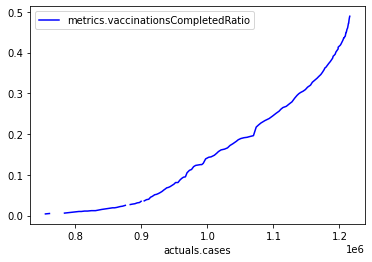

In [26]:

# a scatter plot comparing num_children and num_pets
data.plot(kind='line',x='actuals.cases',y='metrics.vaccinationsCompletedRatio',color='blue')
plt.show()